In [1]:
from pdf2image import convert_from_path
import easyocr
import numpy as np
import PIL
from PIL import ImageDraw
import spacy

In [2]:
reader = easyocr.Reader(['da'], gpu=True)

result = reader.readtext('page_1.jpg')

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
G:\Programming\ArbejdeCarve\bif\Python\venv\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [3]:
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)

    return image

In [5]:

images = convert_from_path('SNV115.pdf')

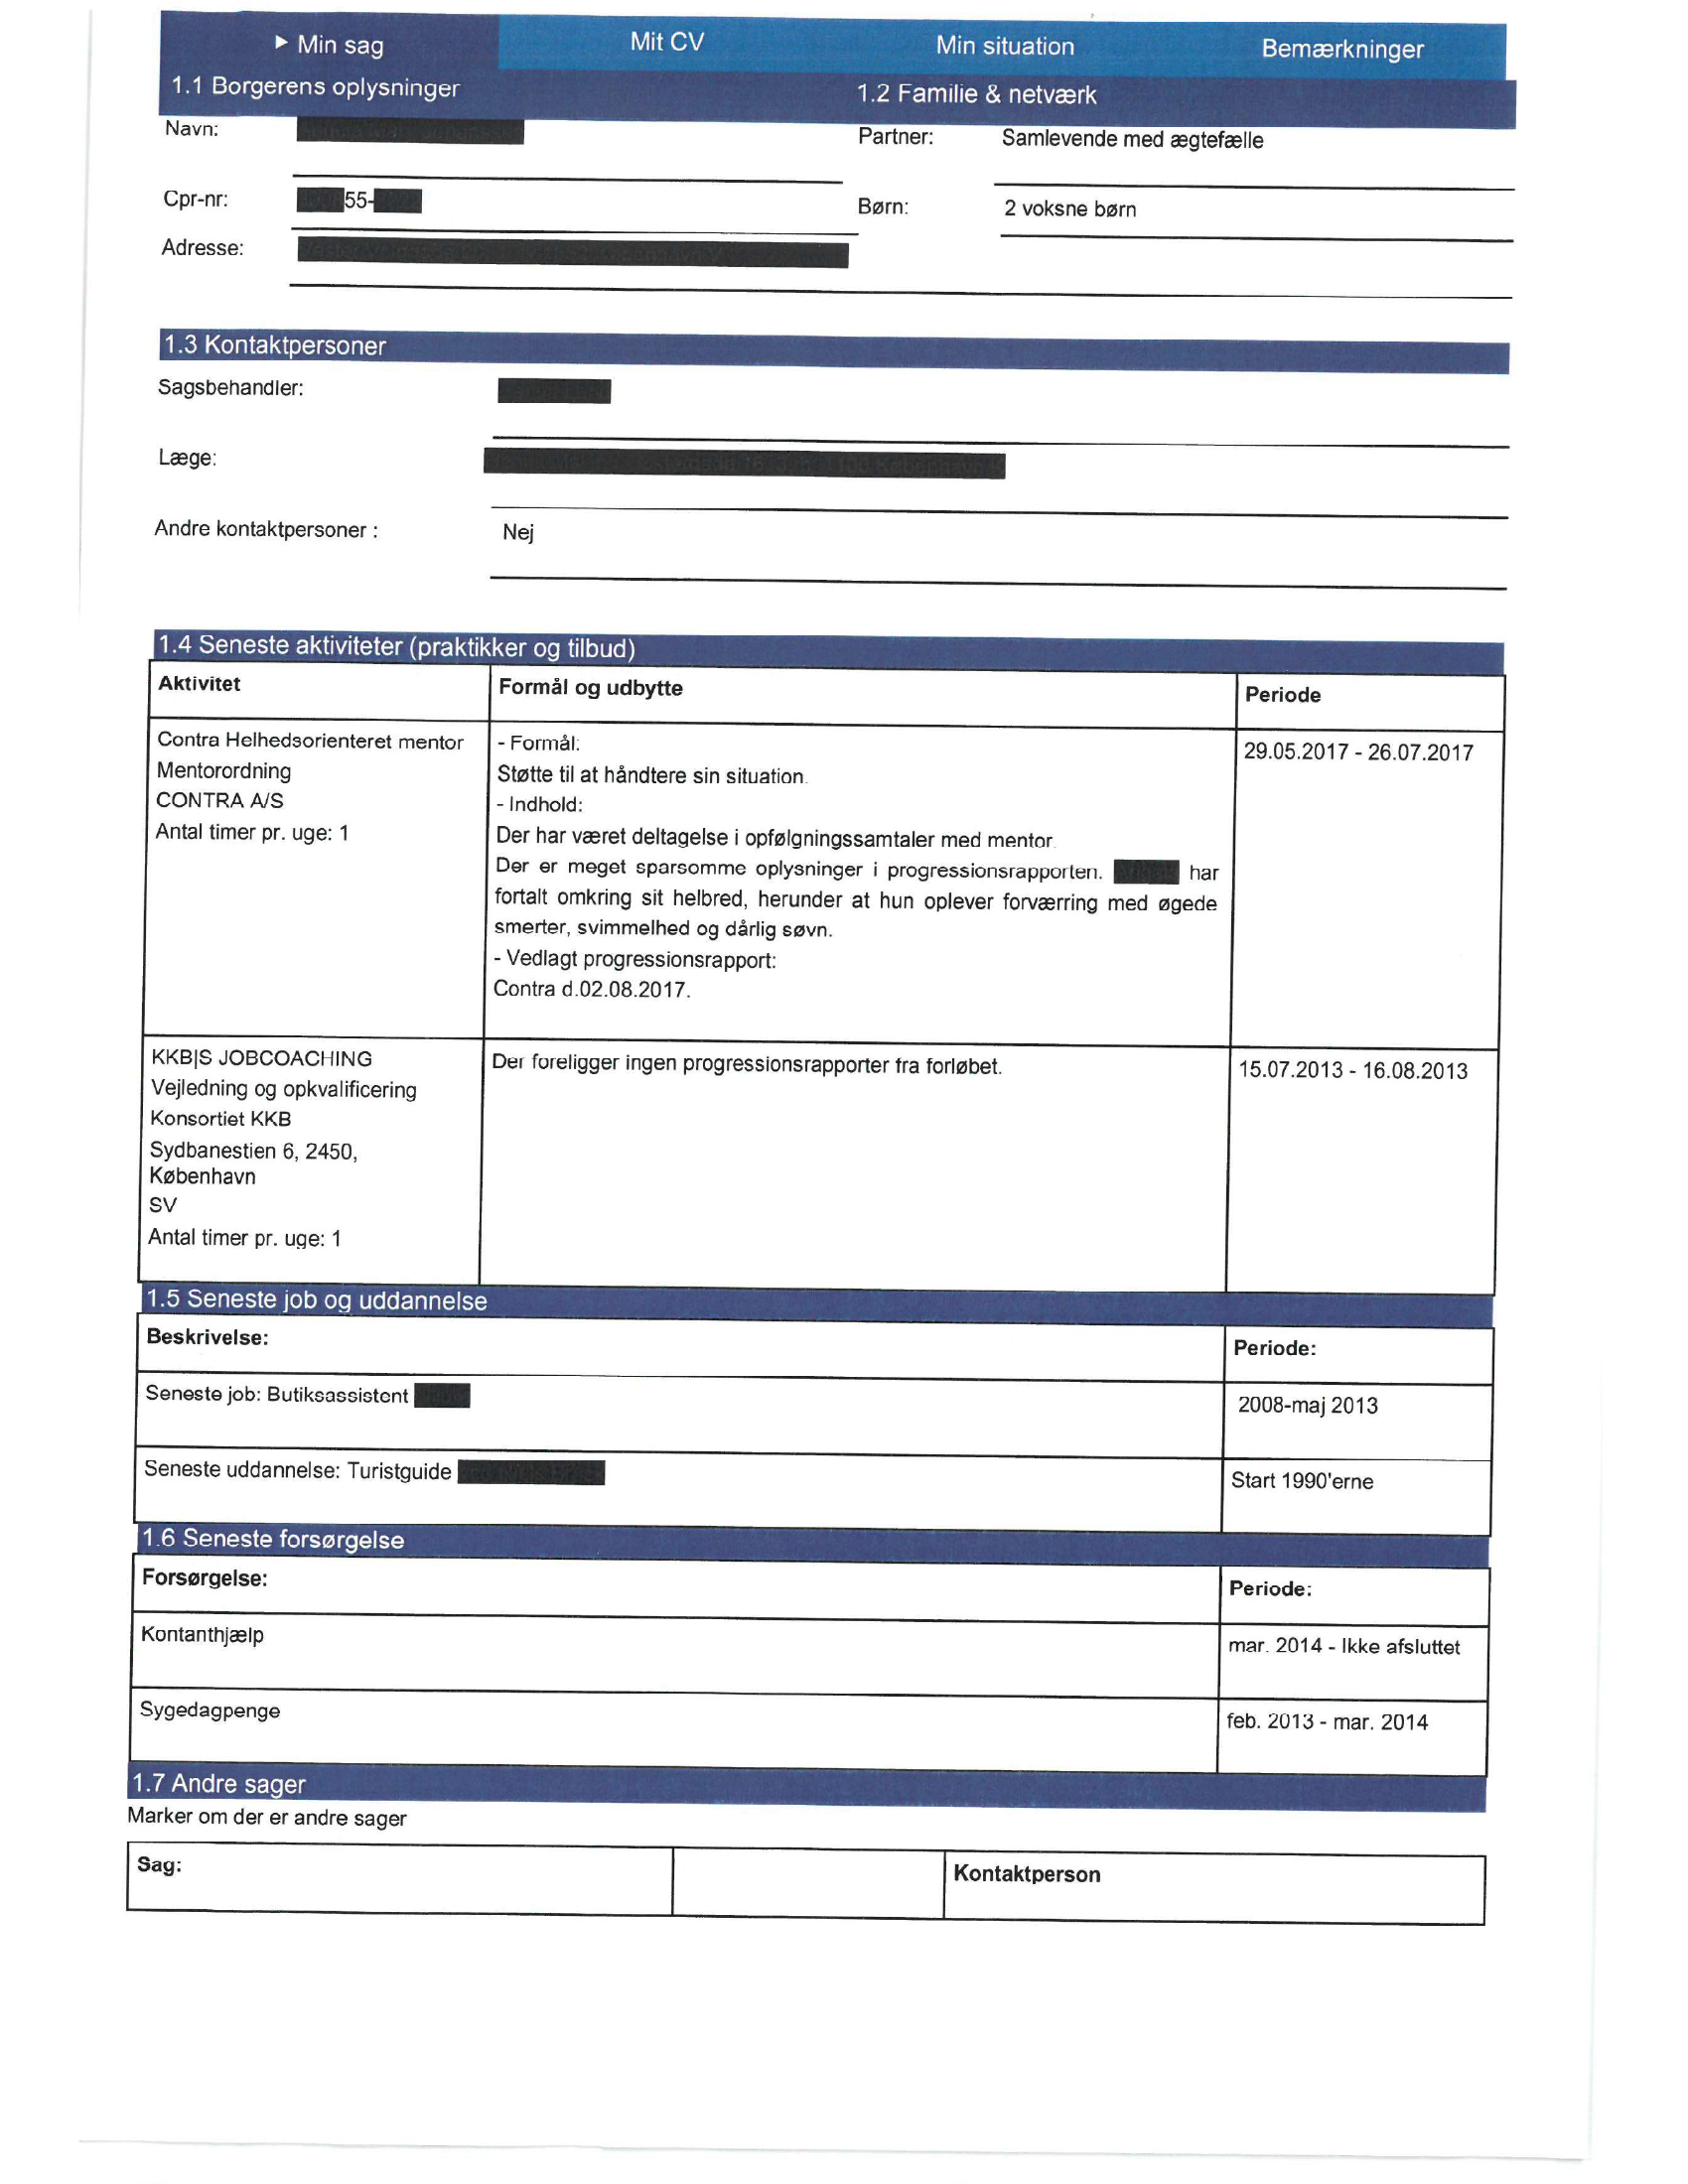

In [6]:
images[0]

In [7]:
bounds = reader.readtext(np.array(images[0]))

In [15]:
get_text = []

for i in range(len(bounds)):
    get_text.append(bounds[i][1])

In [16]:
get_text


['Min sag',
 'Mit CV',
 'Min situation',
 'Bemærkninger',
 '1.1 Borgerens oplysninger',
 '1.2 Familie & netværk',
 'Navn:',
 'Partner:',
 'Samlevende med ægtefælle',
 'Cpr-nr:',
 'Børn:',
 '2 voksne børn',
 'Adresse:',
 '1.3 Kontaktpersoner',
 'Sagsbehandler:',
 'Læge:',
 'Andre kontaktpersoner',
 'Nej',
 '1.4 Seneste aktiviteter (praktikker og tilbud)',
 'Aktivitet',
 'Formål 0g udbytte',
 'Periode',
 'Contra Helhedsorienteret mentor',
 'Formål:',
 '29.05.2017',
 '26.07.2017',
 'Mentorordning',
 'Støtte til at håndtere sin situation',
 'CONTRA AS',
 'Indhold:',
 'Antal timer pr. uge:',
 'Der har været deltagelse',
 'opfølgningssamtaler med mentor',
 'Der',
 'er',
 'meget sparsomme oplysninger',
 'progressionsrapporler.',
 'har',
 'fortalt  omkring sit helbred; herunder at hun oplever forværring med øgede',
 'smerter; svimmelhed og',
 'søvn.',
 'Vedlagt progressionsrapport:',
 'Contra d.02.08.2017 .',
 'KKBIS JOBCOACHING',
 'Der foreligger ingen progressionsrapporter tra forløbet:.',
 

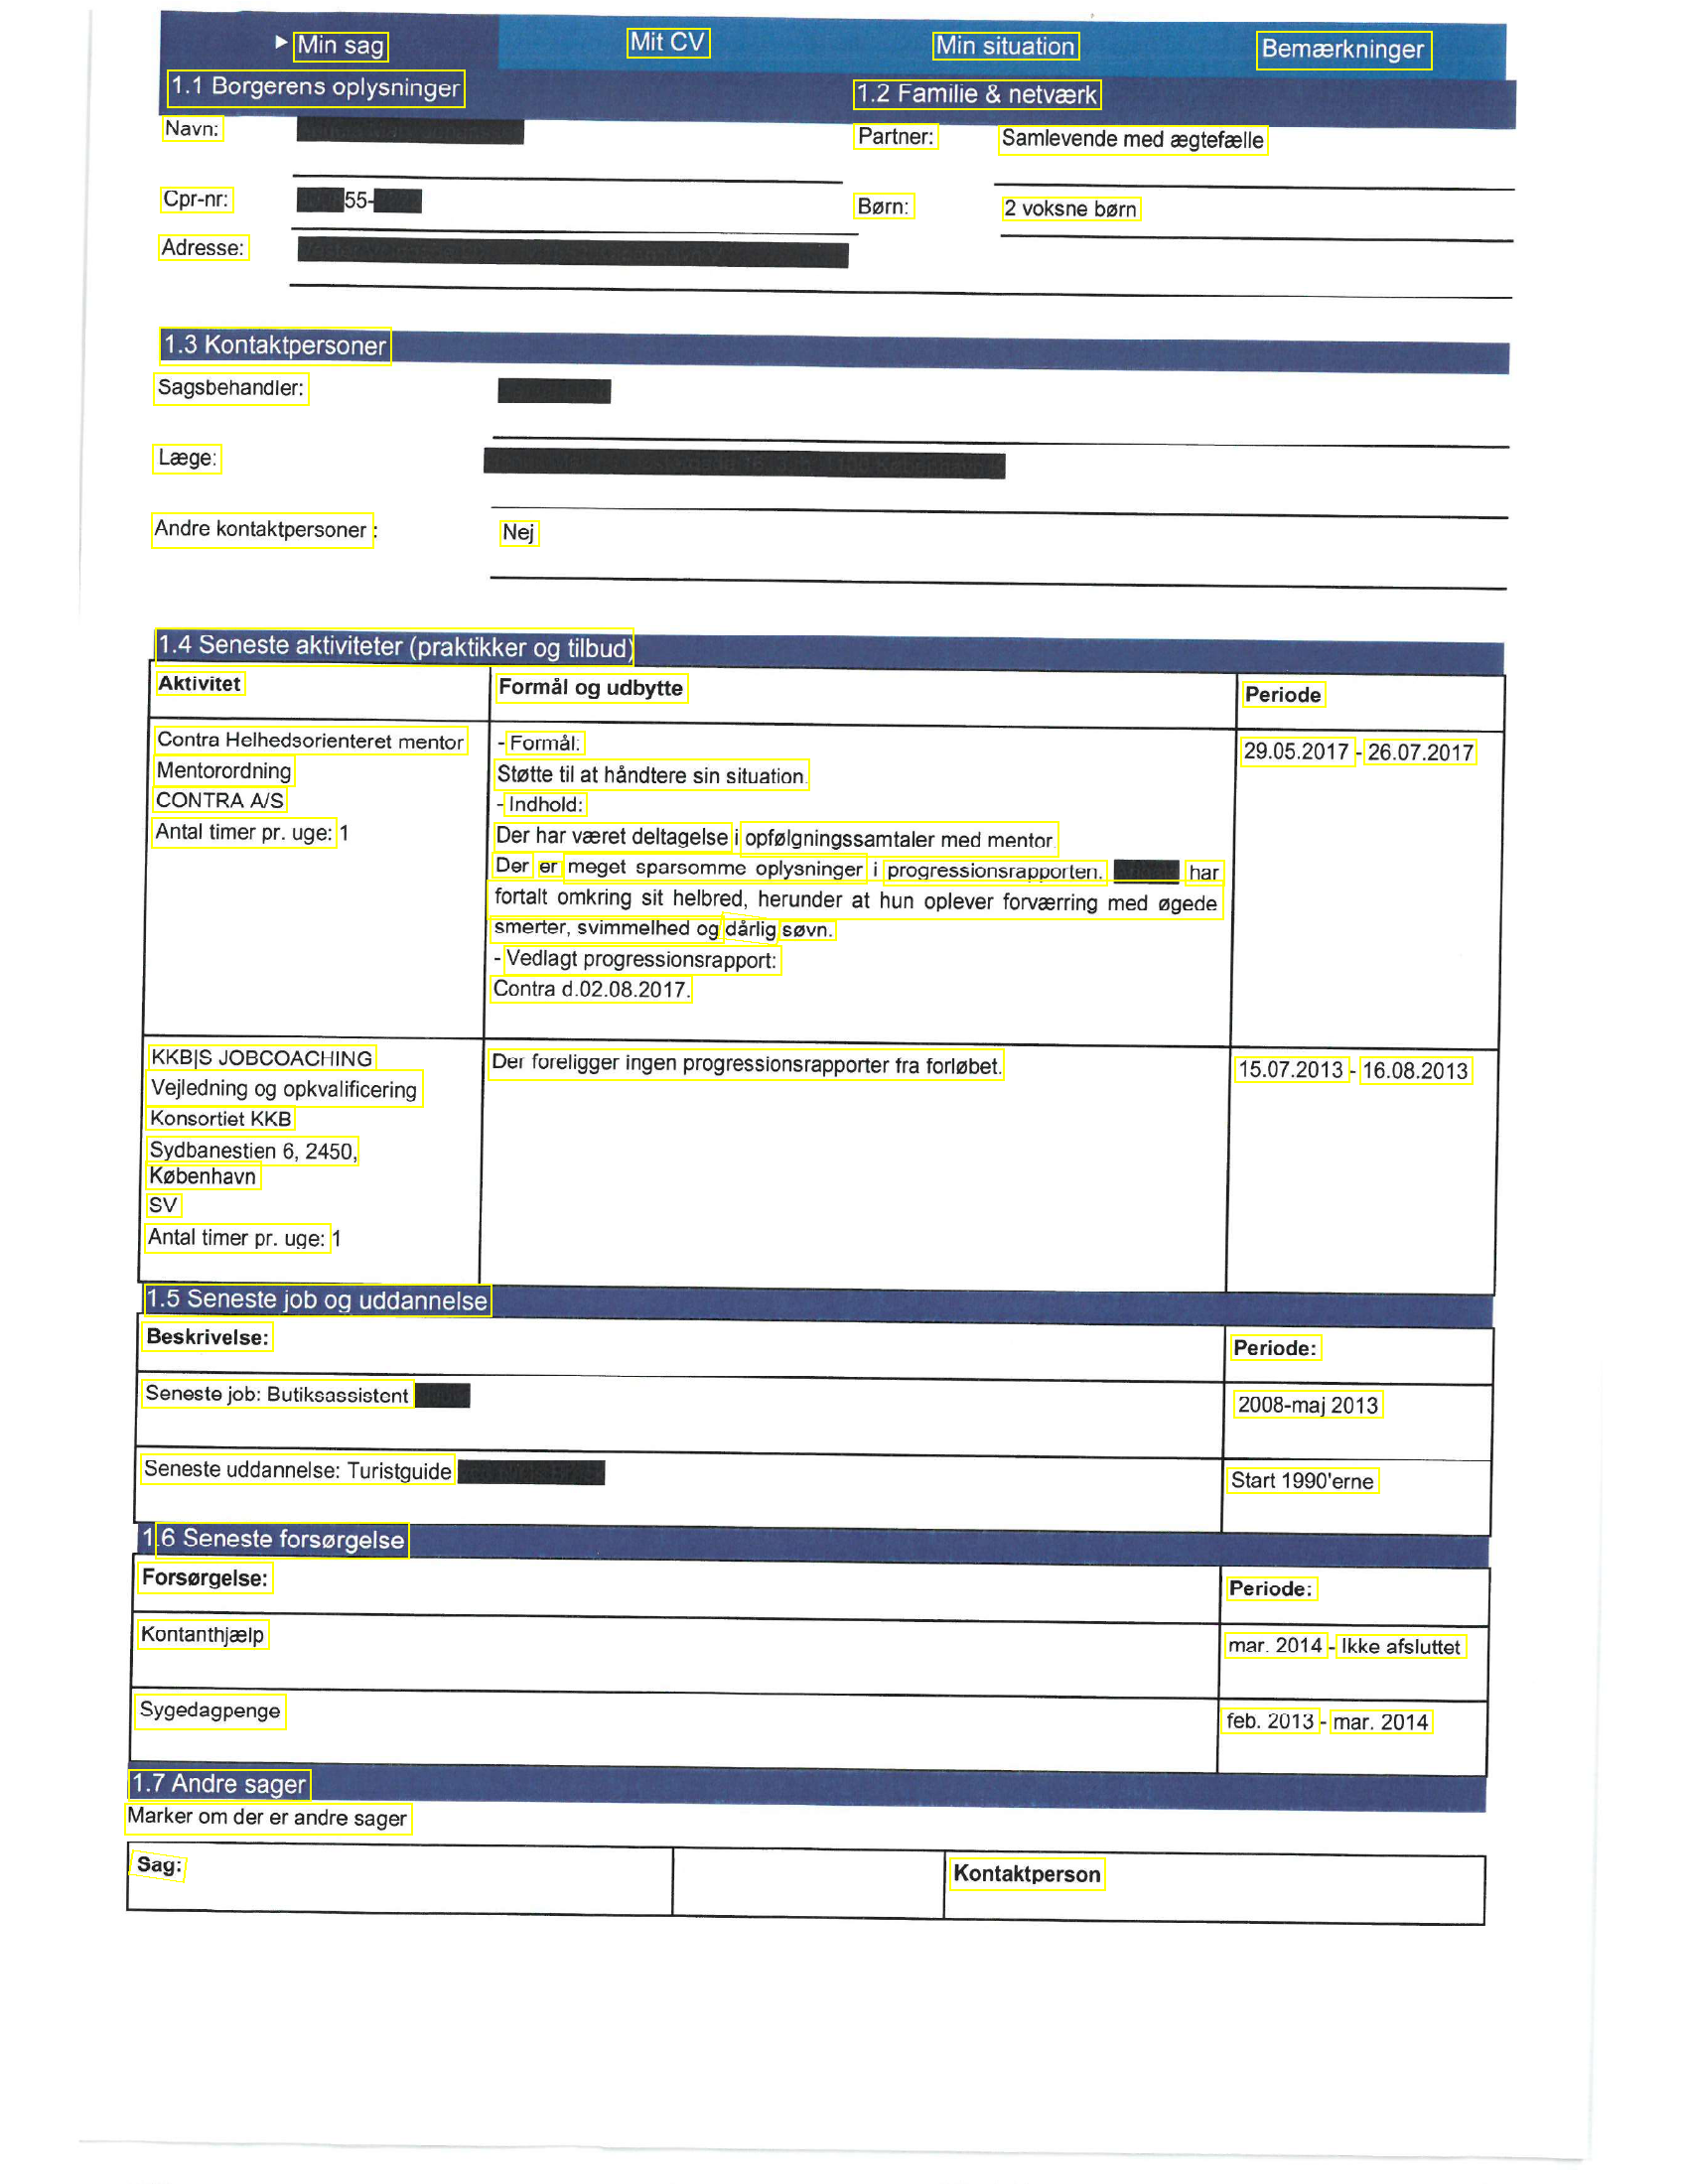

In [9]:
draw_boxes(images[0], bounds)